In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd ../datasets

C:\Users\lamtr\mlcourse.ai\datasets


In [4]:
df = pd.read_csv("telecom_churn.csv")

In [5]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


<AxesSubplot:xlabel='Customer service calls', ylabel='Count'>

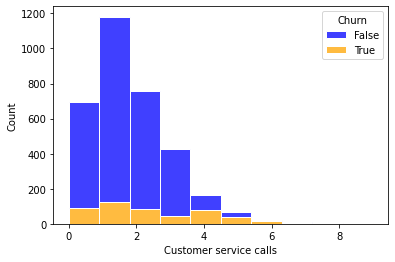

In [26]:
sns.histplot(data=df, x='Customer service calls', hue='Churn', bins=10, palette={False: 'blue', True: 'orange'}, multiple='stack', edgecolor="white")

In [32]:
get_bootstrap_samples(loyal_calls, 2)

array([[2, 1, 1, ..., 0, 1, 2],
       [0, 1, 1, ..., 2, 1, 0]], dtype=int64)

In [37]:
data = loyal_calls
indices = np.random.randint(0, len(data), (10, len(data)))
data[indices]

array([[1, 3, 0, ..., 1, 2, 0],
       [2, 3, 3, ..., 2, 0, 3],
       [0, 2, 1, ..., 3, 1, 0],
       ...,
       [0, 1, 1, ..., 3, 1, 0],
       [3, 1, 3, ..., 1, 0, 1],
       [0, 1, 1, ..., 2, 1, 2]], dtype=int64)

In [77]:
np.percentile(np.arange(0, 101), q=[5, 95])

array([ 5., 95.])

In [79]:
def get_boostrap_samples(data, n_samples):
    samples = data.sample(n=n_samples*data.shape[0], replace=True)
    return samples.to_numpy().reshape(n_samples, data.shape[0])
def get_intervals(n_samples, alpha):
    a = np.mean(n_samples, axis=1)
    return np.percentile(a, q=[100 * alpha / 2, 100 * (1 - alpha / 2)])

In [80]:
#confidence interval p_value = 0.05 for the number of customer service calls by loyal and churn customers
loyal_cs_calls = df.loc[df["Churn"]==False, "Customer service calls"]
churn_cs_calls = df.loc[df["Churn"]==True, "Customer service calls"]

In [82]:
#CI for loyal customers
print(get_intervals(get_boostrap_samples(loyal_cs_calls, 1000), 0.05))
#CI for churn customers
print(get_intervals(get_boostrap_samples(churn_cs_calls, 1000), 0.05))

[1.40877193 1.49017544]
[2.06418219 2.39756729]
